<a href="https://colab.research.google.com/github/RenataJmz/IN2039/blob/main/Analisis_SAT_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis SAT 2010 College Board Results

In [35]:
path = 'https://raw.githubusercontent.com/RenataJmz/IN2039/main/SAT__College_Board__2010_School_Level_Results_20240820.csv'

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
import statsmodels.api as sm
from sklearn import linear_model

In [37]:
df = pd.read_csv(path)
df

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
455,75R025,South Richmond High School,10.0,407.0,421.0,400.0
456,75X012,PS12X LEWIS AND CLARK SCHOOL,NaN,NaN,NaN,NaN
457,75X754,P754 X - Jeffrey M. Rapport School for Career ...,NaN,NaN,NaN,NaN
458,76K460,John Jay High School,9.0,390.0,381.0,398.0


## Descripcion de la base de datos
En esta base de datos lo que se hará será analizar los resultados del SAT College Board de 2010, School Level Results.


In [38]:
df.columns

Index(['DBN', 'School Name', 'Number of Test Takers', 'Critical Reading Mean',
       'Mathematics Mean', 'Writing Mean'],
      dtype='object')

## Variables
La variables a utilizar para este analisis son las siguientes:


*   **School Name**: esta variable muestra los nombres de las escuelas que tomaron el examen y es una variable categorica.
*   **Number of Test Takers**: Esta variable muestra el numero del examenes que se tomaron por escuela y es una variable numerica.
*   **Critical Reading Mean:** esta variable muestra el promedio de los resultados de Critic Reading por escuela, y es una variable numerica.
*   **Mathematics Mean:** esta variable muestra el promedio de los resultados de Mathematics(matematicas) por escuela, y es una variable numerica.
*   **Writing Mean:** esta variable muestra el promedio de los resultados de Writing por escuela, y es una variable numerica.


In [39]:
#Verificacion de existencia de valor nulo.
df.isnull().any()

,0
DBN,False
School Name,False
Number of Test Takers,True
Critical Reading Mean,True
Mathematics Mean,True
Writing Mean,True


In [40]:
#verificacion de nulos en filas
df.isnull().sum(axis=1)

,0
0,0
1,0
2,0
3,0
4,4
...,...
455,0
456,4
457,4
458,0


In [41]:
#identificacion de valores nulos o faltantes.
df.isnull()

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,True,True,True,True
...,...,...,...,...,...,...
455,False,False,False,False,False,False
456,False,False,True,True,True,True
457,False,False,True,True,True,True
458,False,False,False,False,False,False


In [42]:
#contar la cantidad de valores nulos o faltantes.
df.isnull().sum()

,0
DBN,0
School Name,0
Number of Test Takers,74
Critical Reading Mean,74
Mathematics Mean,74
Writing Mean,74


In [43]:
#numero de filas y columnas que contiene.
df.shape

(460, 6)

In [44]:
df = df.dropna()
df


,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0
...,...,...,...,...,...,...
448,32K554,ALL CITY LEADERSHIP SECONDARY,29.0,394.0,420.0,395.0
449,32K556,Bushwick Leaders High School for Academic Excel,30.0,357.0,345.0,351.0
455,75R025,South Richmond High School,10.0,407.0,421.0,400.0
458,76K460,John Jay High School,9.0,390.0,381.0,398.0


In [45]:
df.shape

(386, 6)

In [46]:
df.isnull().sum()

,0
DBN,0
School Name,0
Number of Test Takers,0
Critical Reading Mean,0
Mathematics Mean,0
Writing Mean,0


# 1. ¿Cual es la escuela con el mayor numero de estudiantes que tomaron el SAT?

In [47]:
max_estu = df[df['Number of Test Takers'] == df['Number of Test Takers'].max()]
max_estu

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
235,13K430,BROOKLYN TECHNICAL HIGH SCHOOL,1047.0,588.0,652.0,581.0


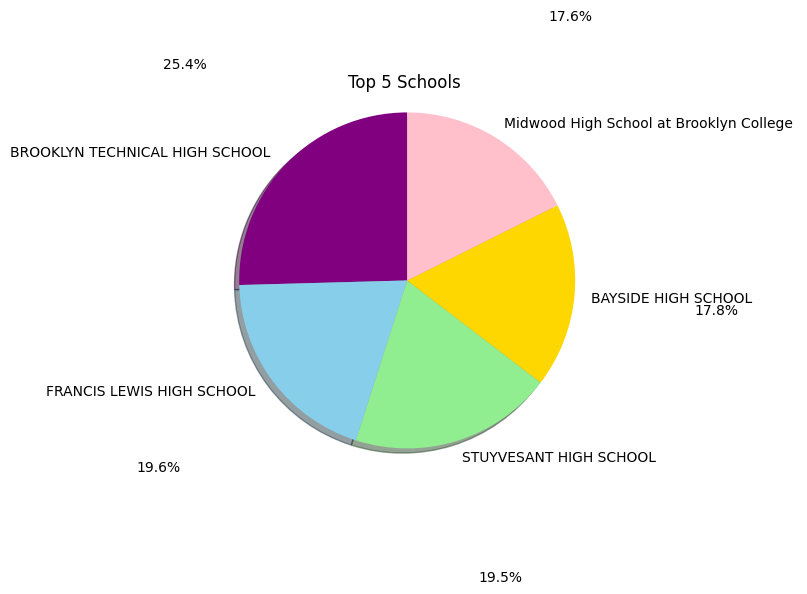

In [48]:
top5 = df.nlargest(5, 'Number of Test Takers')
plt.pie(top5['Number of Test Takers'], labels=top5['School Name'], colors=['purple', 'skyblue', 'lightgreen', 'gold', 'pink'],
        shadow=True, startangle=90, pctdistance=1.85

        , autopct='%1.1f%%')
plt.axis('equal')
plt.title('Top 5 Schools ')
plt.show()


Respuesta. La escuela con mayor de estudiantes que tomaron el SAT fue la escuela brooklyn tecnical highschool con un numero de 1047 examenes tomados.

# 2. ¿Cual es el promedio de los puntajes de "critical writting, "mathematics" y "writing" en todas las escuelas?

In [49]:
promedios = df[['Critical Reading Mean', 'Mathematics Mean', 'Writing Mean']].mean()
promedios

,0
Critical Reading Mean,404.248705
Mathematics Mean,412.935233
Writing Mean,397.689119


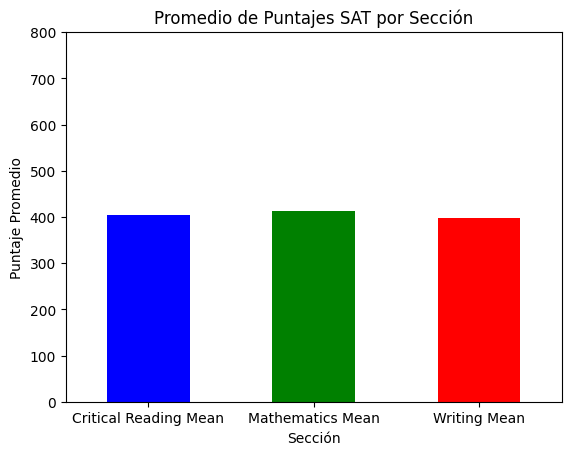

In [50]:
promedios.plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Promedio de Puntajes SAT por Sección')
plt.ylabel('Puntaje Promedio')
plt.xlabel('Sección')
plt.ylim(0, 800)
plt.xticks(rotation=0)
plt.show()

Respuesta. El promedio de cada una de las variables de todas las escuelas es el siguiente:

*   Critical Reading = 404.24
*   Mathematics = 412.93
*   Writing = 397.68

# 3. ¿Cuál es la distribucion del número de exámenes tomados entre las escuelas?

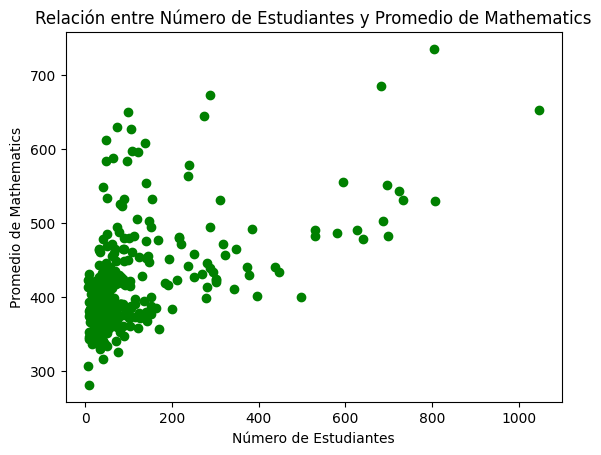

In [51]:
plt.scatter(df['Number of Test Takers'], df['Mathematics Mean'], color='green')
plt.title('Relación entre Número de Estudiantes y Promedio de Mathematics')
plt.xlabel('Número de Estudiantes')
plt.ylabel('Promedio de Mathematics')
plt.show()


Respuesta:
En el grafico de dispercion se muestra una correlacion positiva con tendencia ascendente, lo que significa que las escuelas con mas estudiantes tomando el examen tienden a obtener mejores resultados en matematicas.

# 4. ¿Cómo se distribuyen los promedios de "Critical Reading", "Mathematics" y "Writing" para las 10 escuelas con los puntajes más altos en "Writing"?

<ipython-input-52-df7b5fb5912c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Subject', y='Mean Score', data=top10_writing, inner='quartile', palette='Set3')


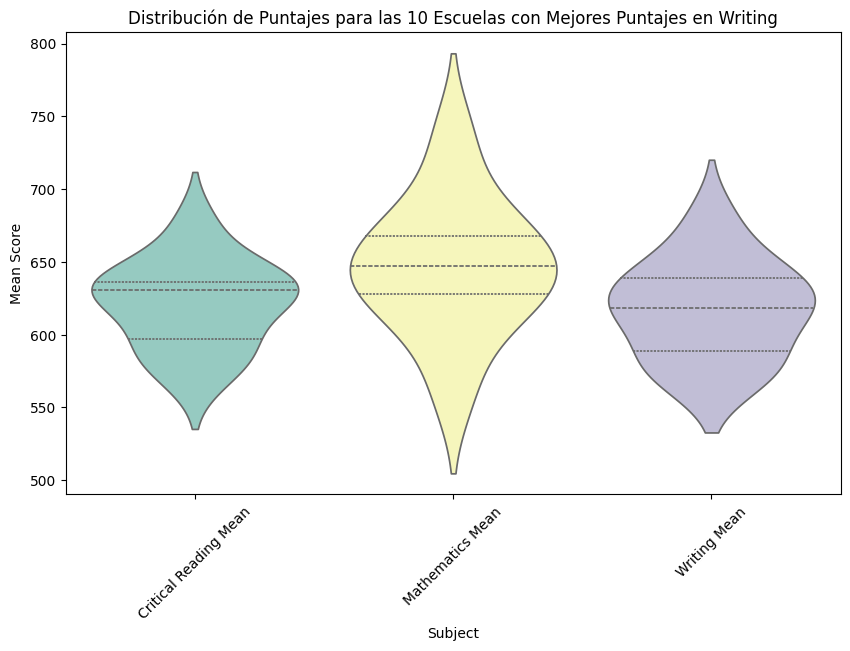

In [52]:
top10_writing = df.nlargest(10, 'Writing Mean')
top10_writing = top10_writing[['School Name', 'Critical Reading Mean', 'Mathematics Mean', 'Writing Mean']]
top10_writing = top10_writing.melt(id_vars='School Name', value_vars=['Critical Reading Mean', 'Mathematics Mean', 'Writing Mean'], var_name='Subject', value_name='Mean Score')

plt.figure(figsize=(10, 6))
sns.violinplot(x='Subject', y='Mean Score', data=top10_writing, inner='quartile', palette='Set3')
plt.title('Distribución de Puntajes para las 10 Escuelas con Mejores Puntajes en Writing')
plt.xticks(rotation=45)
plt.show()


Respuesta:
Mathematics es la variable con los mejores promedios de los estudiantes que tomaron el SAT.

# 5. ¿Cómo varía la desviación estándar de los puntajes de "Mathematics" con respecto al número de estudiantes?

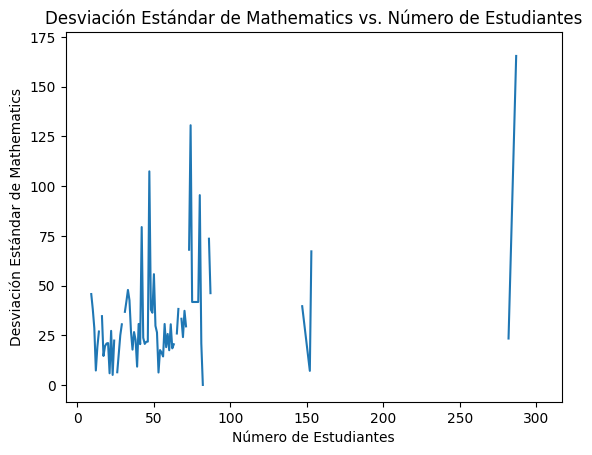

In [53]:
std_by_num_takers = df.groupby('Number of Test Takers')['Mathematics Mean'].std()
plt.plot(std_by_num_takers.index, std_by_num_takers.values)
plt.title('Desviación Estándar de Mathematics vs. Número de Estudiantes')
plt.xlabel('Número de Estudiantes')
plt.ylabel('Desviación Estándar de Mathematics')
plt.show()


Respuesta: Despues de analizar el grafico vemos que la desviacion esandar de los puntuaje de 'Mathematics' varia, lo cual esto nos dice que depende de la escuela el puntuaje de los estudiantes. Vemos que hay una variabilidad estre los primeros 100 estudiantes, en donde se observa una fluctuacion significativa en la desviacion estandar, con picos elevados. Hay un salto significativo que ocurre con mas de 300 estudiantes, en donde la desviacion es mas alta, esto dice que hay un alta dispersion en los resultados en clases muy grandes y un gran rendimiento de los estudaintes, posiblemente con mayor heterogeneidad del grupo.

# 6. ¿Cómo se distribuyen los puntuajes de la escuelas de las 3 materias?

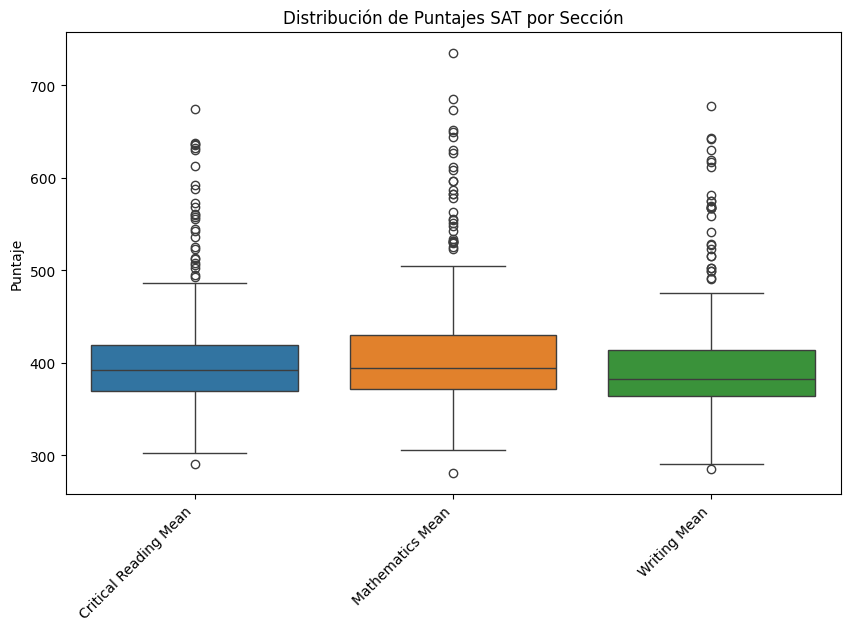

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Critical Reading Mean', 'Mathematics Mean', 'Writing Mean']])
plt.title('Distribución de Puntajes SAT por Sección')
plt.ylabel('Puntaje')
plt.xticks(rotation=45, ha='right')
plt.show()


Respuesta:
Las 3 variables estan distribuidos de manera similar, con medianas de alrededor de 400, con varios valores atipicos mas altos, lo que nos dice que una escuelas tienes mejor puntuaje que las del promedio.

# 7. ¿Cuál es la tendencia del promedio de "Writing" a medida que aumenta el número de estudiantes que tomaron el examen?

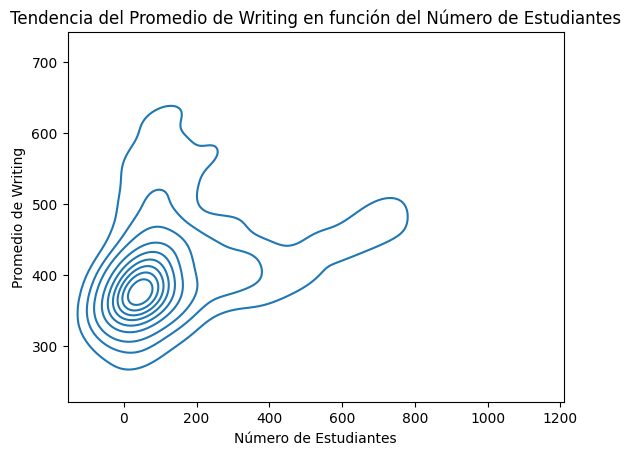

In [77]:
sns.kdeplot(x='Number of Test Takers', y='Writing Mean', data=df)
plt.title('Tendencia del Promedio de Writing en función del Número de Estudiantes')
plt.xlabel('Número de Estudiantes')
plt.ylabel('Promedio de Writing')
plt.show()


Respuesta:
La tendencia muestra que a medida que aumenta el munero de estidantes que tomaron el examen, aumenta tambien el promedio de la misma, exactamente despues de los 400.

# 8. ¿Cómo se distribuyen las medias de "Critical Reading", "Mathematics", y "Writing" en relación con el número de exámenes tomados?

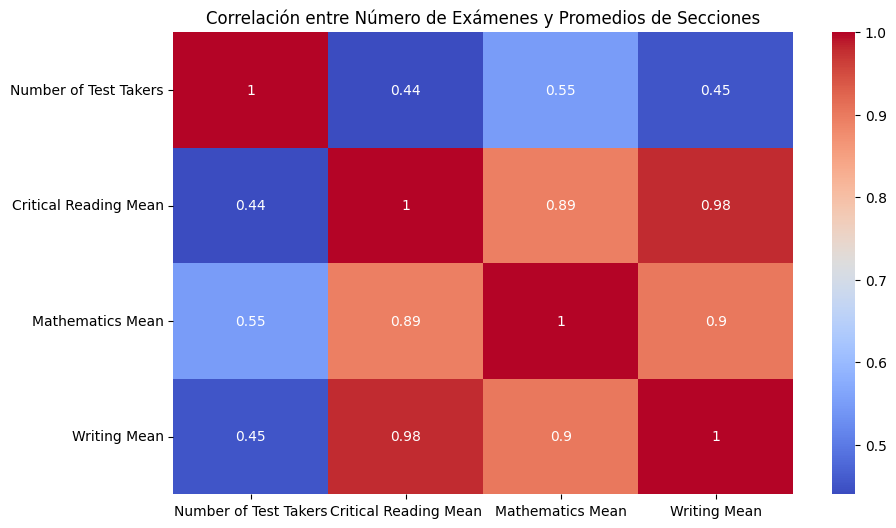

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Number of Test Takers', 'Critical Reading Mean', 'Mathematics Mean', 'Writing Mean']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre Número de Exámenes y Promedios de Secciones')
plt.show()


Respuesta:
Los puntajes del SAT muestrn un alta varaibilidad con relacion al numero de estudiantes que tomaron el examen, lo que tambien muestra que a medida que aumentarone l numero de estudiantes hubo mayor dispersion.

# Regresion Lineal con variable numerica

Critical Reading Mean = bO + b1 * Mathematics Mean.

In [57]:
path2 = 'https://raw.githubusercontent.com/RenataJmz/IN2039/main/SAT__College_Board__2010_School_Level_Results_202408202.csv'

In [58]:
ndf = pd.read_csv(path2)
ndf

,DBN,School Name,NumberofTestTakers,CriticalReadingMean,MathematicsMean,WritingMean
0,01M292,Henry Street School for International Studies,Medio,391.0,425.0,385.0
1,01M448,University Neighborhood High School,Medio,394.0,419.0,387.0
2,01M450,East Side Community High School,Medio,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,Bajo,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,Bajo,NaN,NaN,NaN
...,...,...,...,...,...,...
455,75R025,South Richmond High School,Bajo,407.0,421.0,400.0
456,75X012,PS12X LEWIS AND CLARK SCHOOL,Bajo,NaN,NaN,NaN
457,75X754,P754 X - Jeffrey M. Rapport School for Career ...,Bajo,NaN,NaN,NaN
458,76K460,John Jay High School,Bajo,390.0,381.0,398.0


In [59]:
ndf = ndf.dropna()
ndf

,DBN,School Name,NumberofTestTakers,CriticalReadingMean,MathematicsMean,WritingMean
0,01M292,Henry Street School for International Studies,Medio,391.0,425.0,385.0
1,01M448,University Neighborhood High School,Medio,394.0,419.0,387.0
2,01M450,East Side Community High School,Medio,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,Bajo,385.0,370.0,378.0
5,01M515,Lower East Side Preparatory High School,Alto,314.0,532.0,314.0
...,...,...,...,...,...,...
448,32K554,ALL CITY LEADERSHIP SECONDARY,Bajo,394.0,420.0,395.0
449,32K556,Bushwick Leaders High School for Academic Excel,Medio,357.0,345.0,351.0
455,75R025,South Richmond High School,Bajo,407.0,421.0,400.0
458,76K460,John Jay High School,Bajo,390.0,381.0,398.0


## 9. ¿Cual es la r^2 en la regresion lineal de la variable Mathematics Mean con respecto a el numero de examenes tomados?

In [69]:
favs = ['MathematicsMean','CriticalReadingMean']
endf  = ndf[favs].dropna()
endf

,MathematicsMean,CriticalReadingMean
0,425.0,391.0
1,419.0,394.0
2,431.0,418.0
3,370.0,385.0
5,532.0,314.0
...,...,...
448,420.0,394.0
449,345.0,357.0
455,421.0,407.0
458,381.0,390.0


In [70]:
modelB = sm.OLS.from_formula('CriticalReadingMean ~ MathematicsMean',
                             data=ndf)
resultB = modelB.fit()
summary = resultB.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CriticalReadingMean   R-squared:                       0.799
Model:                             OLS   Adj. R-squared:                  0.799
Method:                  Least Squares   F-statistic:                     1530.
Date:                 Fri, 06 Sep 2024   Prob (F-statistic):          5.18e-136
Time:                         15:06:07   Log-Likelihood:                -1796.6
No. Observations:                  386   AIC:                             3597.
Df Residuals:                      384   BIC:                             3605.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          81.4939      8.353      9.757      0.000      65.071      97.916
MathematicsMean     0.7816      0.020     39.116      0.000       0.742       0.821
==============================================================================
Omnibus:                      188.704   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1951.575
Skew:                          -1.805   Prob(JB):                         0.00
Kurtosis:                      13.407   Cond. No.                     2.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# Critical Reading Mean = 81.4939 + 0.7816 * MathematicsMean

In [72]:
print('La r^2 de la variable Mathematics Mean con respecto a el numero de examenes tomados fue:',0.799 )

La r^2 de la variable Mathematics Mean con respecto a el numero de examenes tomados fue: 0.799


Respuesta.
La r^2 de la variable Mathematics Mean con respecto a el numero de examenes tomados fue 0.799


#Regresion lineal con variable categorica

## 10. ¿Cual es el Intercept de la regresion lineal categorica de School Name?

Critical Reading Mean = bO + b1 * Number of test taken.

In [61]:
favs = ['NumberofTestTakers','CriticalReadingMean']
indf  = ndf[favs].dropna()
indf

,NumberofTestTakers,CriticalReadingMean
0,Medio,391.0
1,Medio,394.0
2,Medio,418.0
3,Bajo,385.0
5,Alto,314.0
...,...,...
448,Bajo,394.0
449,Medio,357.0
455,Bajo,407.0
458,Bajo,390.0


In [62]:
modelB = sm.OLS.from_formula('CriticalReadingMean ~ NumberofTestTakers',
                             data=ndf)
resultB = modelB.fit()
summary = resultB.summary()
summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CriticalReadingMean   R-squared:                       0.132
Model:                             OLS   Adj. R-squared:                  0.128
Method:                  Least Squares   F-statistic:                     29.16
Date:                 Fri, 06 Sep 2024   Prob (F-statistic):           1.63e-12
Time:                         14:49:07   Log-Likelihood:                -2079.2
No. Observations:                  386   AIC:                             4164.
Df Residuals:                      383   BIC:                             4176.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     439.6667      5.503     79.899      0.000     428.847     450.486
NumberofTestTakers[T.Bajo]    -57.4638      8.432     -6.815      0.000     -74.042     -40.886
NumberofTestTakers[T.Medio]   -43.3318      6.546     -6.619      0.000     -56.203     -30.461
==============================================================================
Omnibus:                      135.891   Durbin-Watson:                   1.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              449.691
Skew:                           1.597   Prob(JB):                     2.24e-98
Kurtosis:                       7.215   Cond. No.                         4.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# Critical Reading Mean = 	439.6667 + -57.4638 * NumberofTestTakers[T.Bajo] -43.3318 * NumberofTestTakers[T.Medio]

In [75]:
# Critical Reading Mean = 	439.6667 + -57.4638 * -43.3318

In [74]:
print('El intercept de Critical Reading Mean en la regresion lineal es de:', 439.6667)

El intercept de Critical Reading Mean en la regresion lineal es de: 439.6667


Respuesta.
El intercept de Critical Reading Mean en la regresion lineal es de 439.6667.